# Equações de Friedmann sem perturbações

Primeiro vamos explorar ao máximo as equações de Friedmann, para o modelo $\Lambda CDM$ em um universo plano ($k = 0$). As equações são:

$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G \rho}{3}  $$ 

$$ \dot{\rho} + 3 \frac{\dot{a}}{a} (\rho + P)=0 $$

$$ \frac{\ddot a}{a} = -\frac{4 \pi G}{3}\left(\rho + \frac{3p}{c^2}\right) $$ 





A densidade de energia para o modelo $\Lambda CDM$, com $k \approx 0$, é distribuida da segunte forma:

$$ \Omega_m + \Omega_r + \Omega_\Lambda = 1 $$

$$ \Omega_m = 0.3089 \pm 0.0062, \Omega_r \approx 10^{-5}, \Omega_\Lambda = 0.6911 \pm 0.0062 $$

$$ \Omega_i = \frac{\rho_i}{\rho_{cr}} $$

O valor de $ \rho_{cr} $ pode ser obtido a partir da primeira equação de Friedmann:

$$ \rho_{cr} = \frac{3H_0}{8 \pi G} $$

Atualmente temos que  $H_0$ é $ 69.8 \pm 1.9 (km/s)/Mpc $

In [43]:
#Estas constante serão utilizadas extensivamente#

H_0 = 69.8

Omega_m = 0.3089

Omega_r = 10**-5

Omega_L = 0.6911

c= 299792458

Mpc2km= 3.1e19 #Mpc para km

seg2year= 3.2e-8 # segundos para ano

idade_universo = 13589671793.43587 #em anos. Dado obtido pelo programa

eta_zero = 45507112453.57119 #em anos-luz. Dado obtido pelo programa

## Fator de escala em função do tempo

Dividindo a primeira equação de Friedmann por $ \rho_{cr} $, e substituindo cada componente da energia do universo com sua respectiva potência de $a$ obtemos: 

$$\frac{da}{dt}= a H_0\left(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda \right)^{1/2}$$

Onde podemos resolver para $a(t)$.

'Idade do universo: 13.58 bilhões de anos '

'Instante da equivalencia matéria-Lambda: 10.04 bilhões de anos '

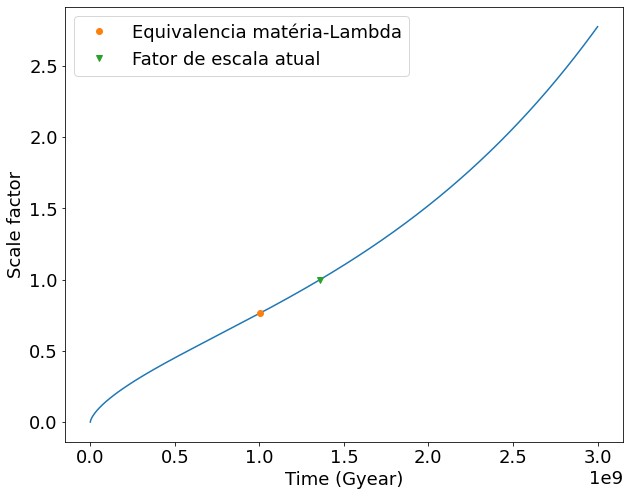

In [40]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

time=np.linspace(1e-8,30e9,50000)

#Equação acima

Friedmann= lambda  a, time, H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L : \
         a * H_0 / (Mpc2km * seg2year) *(Omega_m / a**3 + Omega_r / a**4 + Omega_L)**(1/2)

#tuple com os parâmetros comsológicos

Param=(H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L)

#Cálculo do fator de escala

scale_factor=integrate.odeint(Friedmann,1e-18,time,args=Param)


## Equivalencia matéria-energia escura

soma=0
n=0
for i in range (len(scale_factor)):
    if scale_factor[i] >=0.7146 and scale_factor[i] <= 0.8146:
        soma+=i
        n+=1
equivalencia_m_L=int(soma/n)

## Fator de escala atual

soma=0
n=0
for i in range (len(scale_factor)):
    if scale_factor[i] >=0.95 and scale_factor[i] <= 1.05:
        soma+=i
        n+=1
scale_factor_0=int(soma/n)

#Gráfico

plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})

plt.plot(time/10,scale_factor)
plt.plot(time[equivalencia_m_L]/10,scale_factor[equivalencia_m_L],'o', label='Equivalencia matéria-Lambda')
plt.plot(time[scale_factor_0]/10,scale_factor[scale_factor_0],'v',label='Fator de escala atual')
plt.legend()

plt.xlabel('Time (Gyear)')
plt.ylabel('Scale factor')

display('Idade do universo: {} bilhões de anos '.format(round(time[scale_factor_0]/1e9,2)))
display('Instante da equivalencia matéria-Lambda: {} bilhões de anos '\
        .format(round(time[equivalencia_m_L]/1e9,2)))

## Constante de Hubble em função do fator de escala

Substituindo $\frac{\dot a}{a}$ por $H$: 

$$ H = H_0 \sqrt{\left(\frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4} +\Omega_\Lambda \right)} $$

Constante de Hubble atualmente: 69.8035838775723


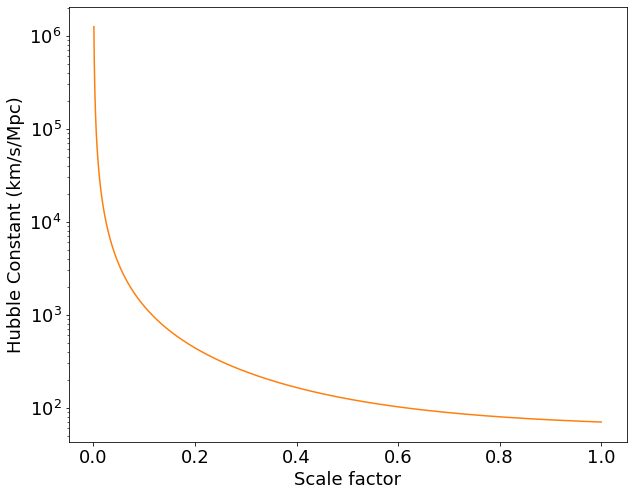

In [39]:
a = []
Hubble = []

#H(a), a equação acima#

def H_a(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_r)*(i**(-4)) + (O_m)*(i**(-3)) + O_L)**0.5

for i in np.arange(0.001, 1, 0.0001):
    a.append(i)
    H = H_a(H_0, Omega_m, Omega_r, Omega_L, i)
    Hubble.append(H)

plt.plot(a, Hubble, "C1")
plt.yscale('log')
plt.ylabel('Hubble Constant (km/s/Mpc)')
plt.xlabel('Scale factor')

print('Constante de Hubble atualmente:', Hubble[9989])

## Contante de Hubble em função do redshift

A partir da primeira equação de Friedmann e substituindo o fator de escala usando a seguinte relação:

$$ a(t) = \frac{1}{1 + z} $$

A expressão para a Constante de Hubble em função do Redshift se torna:

$$ H = H_0 \sqrt{\left(\Omega_m\left(1 + z\right)^3 + \Omega_r\left(1 + z\right)^4 +\Omega_\Lambda \right)} $$

Constante de Hubble atualmente: 69.8003489991275


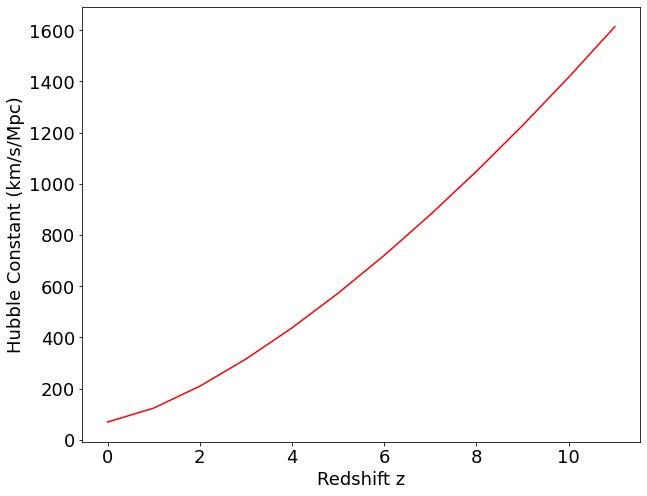

In [6]:
z = []
Hubble = []

def H_z(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_m)*((1+i)**3) + (O_r)*((1+i)**4) + (O_L))**0.5

for i in range(12):
    z.append(i)
    H = H_z(H_0, Omega_m, Omega_r, Omega_L, i)
    Hubble.append(H)

plt.plot(z, Hubble, 'r')
plt.ylabel('Hubble Constant (km/s/Mpc)')
plt.xlabel('Redshift z')

print('Constante de Hubble atualmente:', Hubble[0])

## Dependência da constante de Hubble com a idade do Universo

Já calculamos $a(t)$ e $H(a)$, logo, podemos encontrar $H(t)$.

Text(0.5, 0, 'Time (years)')

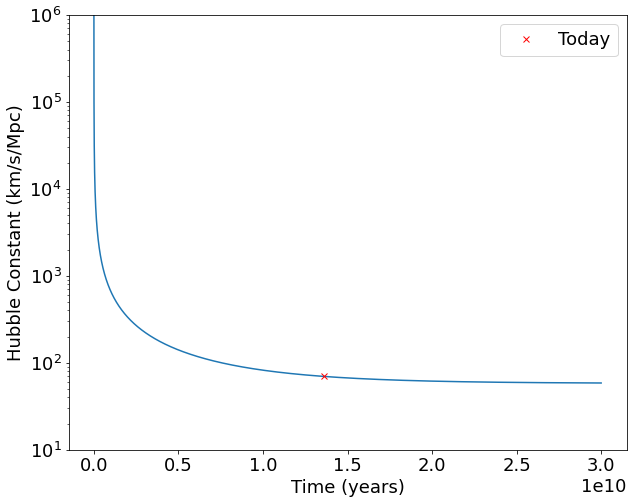

In [8]:
#Aqui eu tentei utilizar a função scale_factor para compor a dependência de H(a(t)), para um dado t em time, calculamos o valor de a com a scale_factor
#e utilizamos o valor para calcular H a partir da função H_a.

Hubble_t = []

for i in range(len(scale_factor)):
    Hubble_t.append(H_a(H_0, Omega_m, Omega_r, Omega_L, scale_factor[i][0]))
    
plt.plot(time, Hubble_t)
plt.yscale('log')
plt.ylim(10, 10e5)
plt.ylabel('Hubble Constant (km/s/Mpc)')
plt.xlabel('Time (years)')

## $\dot a$ em função do tempo

Podemos ver variações na inclinação do fator de escala no primeiro gráfico, isso indica uma troca de dominância para uma determinada espécie de energia. Uma análise de quando isso ocorre pode ser feita a partir da derivada temporal do fator de escala, $\dot a$:

$$aH = a\frac{\dot a}{a} = \dot a = H_0 \sqrt{\left(\frac{\Omega_m}{a} + \frac{\Omega_r}{a^2} +\Omega_\Lambda a^2 \right)} $$

Constante de Hubble no tempo de equivalência $\Omega_m$ e $\Omega_\Lambda$: 67.09852829522109 km/s/Mpc
Inversão de predominância $\Omega_m$ e $\Omega_\Lambda$: 10875817516.350328 years


Text(0.5, 0, 'Age of th universe (years)')

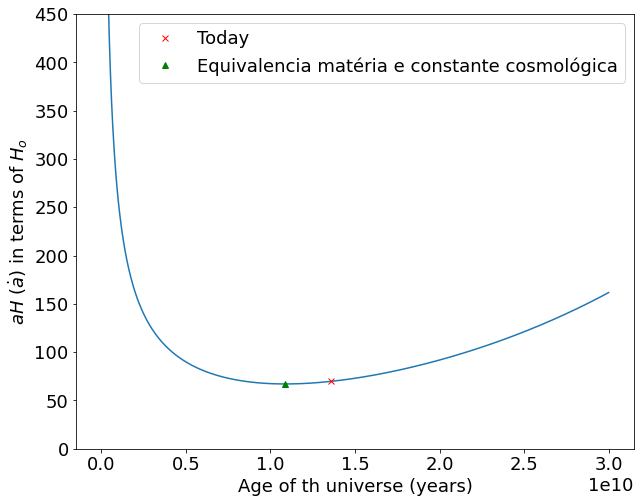

In [7]:
a_dot = []

def aH_a(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_r)*(i**(-1)) + (O_m)*(i**(-2)) + O_L*(i**2))**0.5

for i in range(len(scale_factor)):
    a_dot.append(aH_a(H_0, Omega_m, Omega_r, Omega_L, scale_factor[i][0]))

plt.plot(time, a_dot)
print('Constante de Hubble no tempo de equivalência $\Omega_m$ e $\Omega_\Lambda$:', min(a_dot), 'km/s/Mpc')
print('Inversão de predominância $\Omega_m$ e $\Omega_\Lambda$:', time[18126], 'years')
plt.plot(time, a_dot, 'rx', markevery = [22649], label = 'Today')
plt.plot(time, a_dot, 'g^', markevery = [18126], label = 'Equivalencia matéria e constante cosmológica')
plt.legend()
plt.ylim(0,450)
plt.ylabel('$aH$ ($\dot a$) in terms of $H_o$')
plt.xlabel('Age of th universe (years)')

## Evolução da densidade de energia

Para descobrir como a densidade de energia de uma dada espécie $i$ evolui com o tempo, precisamos resolver a equação do Fluido:

$$\dot{\Omega_i} + 3 H \Omega_i(1 + \omega_i)=0$$

Pois $\rho_i=\rho_{cr} \Omega_i$ e $P=\omega_i \rho_i$ (equação de Estado).

Separando os termos:

$$ \frac{d\Omega_i}{\Omega_i} = -3(1+ \omega_i)\frac{da}{a} $$

Resolvendo a equação diferencial acima,

$$ \Omega_i = \frac{\Omega_0}{a^{3(1+\omega_i)}} $$

O fator de escala da equivalência matéria-radiação é 3.000020000400008e-05:
O fator de escala da equivalência matéria-Lambda é 0.764597645952919:


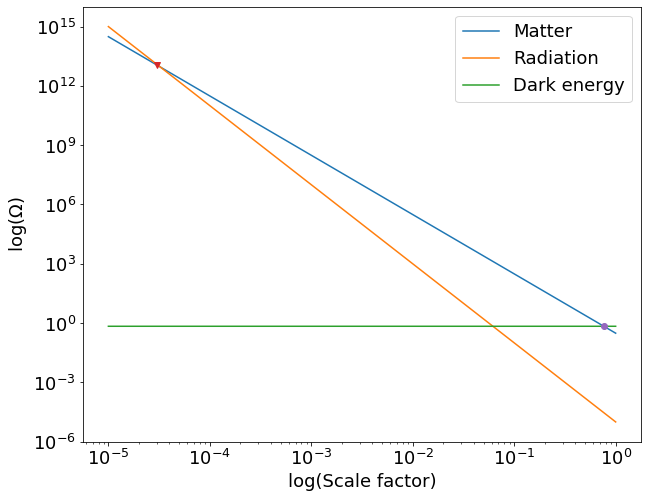

In [77]:
sf_ed=np.linspace(1e-5,1.0,50000)

mat_a=np.empty(len(sf_ed))
radi_a=np.empty(len(sf_ed))
dark_a=np.empty(len(sf_ed))

for i in range (len(sf_ed)):
    mat_a[i]=Omega_m/(sf_ed[i]**(3))
    radi_a[i]=Omega_r/(sf_ed[i]**(4))
    dark_a[i]=Omega_L
    
## Equivalência radiação-matéria

soma=0
n=0
for i in range (len(sf_ed)):
    if sf_ed[i] >= 2.737e-5 and sf_ed[i] <=3.737e-5:
        soma+=i
        n+=1
equivalencia_m_r=int(soma/n)

## Equivalência matéria-Lambda

soma=0
n=0
for i in range (len(sf_ed)):
    if sf_ed[i] >=0.7146 and sf_ed[i] <= 0.8146:
        soma+=i
        n+=1
equivalencia_m_L=int(soma/n)
    
plt.plot(sf_ed,mat_a,label='Matter')
plt.plot(sf_ed,radi_a,label='Radiation')
plt.plot(sf_ed,dark_a,label='Dark energy')

plt.plot(sf_ed[equivalencia_m_r],mat_a[equivalencia_m_r],'v')
plt.plot(sf_ed[equivalencia_m_L],mat_a[equivalencia_m_L],'o')

plt.legend()

plt.yscale('log')
plt.xscale('log')

plt.xlabel('log(Scale factor)')
plt.ylabel('log($\Omega$)')

print("O fator de escala da equivalência matéria-radiação é {}:".format(sf_ed[equivalencia_m_r] ))
print("O fator de escala da equivalência matéria-Lambda é {}:".format(sf_ed[equivalencia_m_L] ))

## Evolução da densidade de energia em função do tempo

A idade da equivalência matéria-radiação é 600.01 mil anos
A idade da equivalência matéria-Lambda é 22.94 bilhões de anos


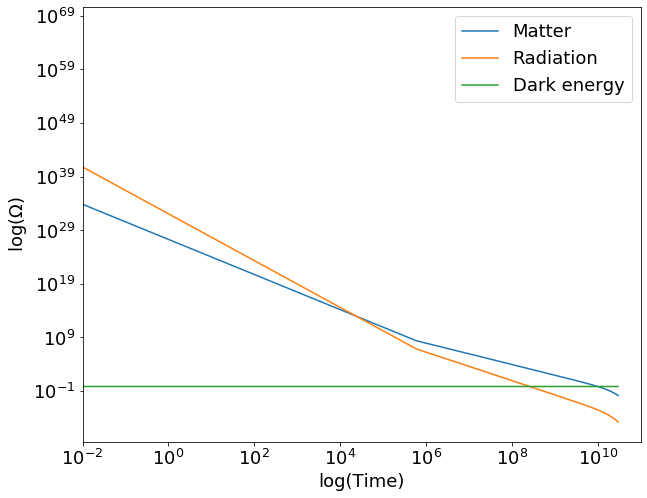

In [78]:
mat_t=np.empty(len(scale_factor))
radi_t=np.empty(len(scale_factor))
dark_t=np.empty(len(scale_factor))

for i in range (len(scale_factor)):
    mat_t[i]=Omega_m/(scale_factor[i]**(3))
    radi_t[i]=Omega_r/(scale_factor[i]**(4))
    dark_t[i]=Omega_L
    
plt.plot(time,mat_t,label='Matter')
plt.plot(time,radi_t,label='Radiation')
plt.plot(time,dark_t,label='Dark energy')

plt.legend()

plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-2,10e10)

plt.xlabel('log(Time)')
plt.ylabel('log($\Omega$)')

print("A idade da equivalência matéria-radiação é {} mil anos".format(round(time[equivalencia_m_r]/1e3,2) ))
print("A idade da equivalência matéria-Lambda é {} bilhões de anos".format(round(time[equivalencia_m_L]/1e9 ,2)))

## Evolução da densidade de energia em função do redshift

Como $a=\frac{1}{(1+z)}$:

$$ \Omega_i = \Omega_0 (1+z)^{3(1+\omega_i)} $$

O redshift da equivalência matéria-radiação é 30099.98 
O redshift da equivalência matéria-Lambda é 0.3


/home/jg/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


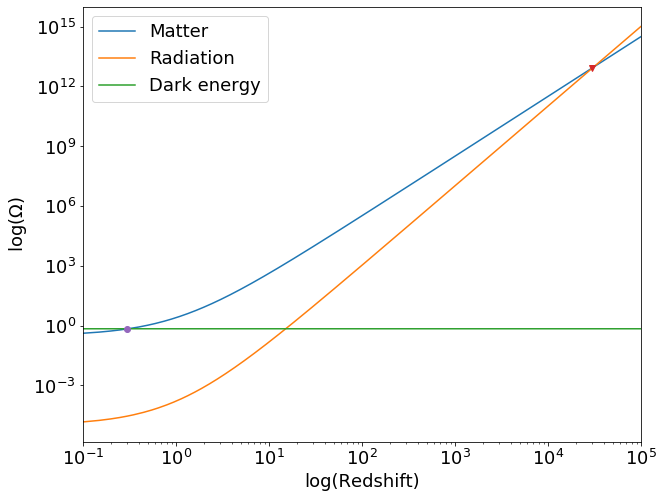

In [79]:
redshift_ed=np.linspace(1e-1,100000,2000000)

mat_z=np.empty(len(redshift_ed))
radi_z=np.empty(len(redshift_ed))
dark_z=np.empty(len(redshift_ed))

for i in range (len(redshift_ed)):
    mat_z[i]=Omega_m * (1+redshift_ed[i]) ** 3
    radi_z[i]=Omega_r * (1+redshift_ed[i]) ** 4
    dark_z[i]=Omega_L
    
## Equivalencia radiação-matéria

soma=0
n=0
for i in range (len(redshift_ed)):
    if redshift_ed[i] >= 3.005e4 and redshift_ed[i] <=3.015e4:
        soma+=i
        n+=1
equivalencia_m_r=int(soma/n)

## Equivalencia matéria-Lambda

soma=0
n=0
for i in range (len(redshift_ed)):
    if redshift_ed[i] >=2.5e-1 and redshift_ed[i] <= 3.5e-1:
        soma+=i
        n+=1
equivalencia_m_L=int(soma/n)
    
plt.plot(redshift_ed,mat_z,label='Matter')
plt.plot(redshift_ed,radi_z,label='Radiation')
plt.plot(redshift_ed,dark_z,label='Dark energy')

plt.plot(redshift_ed[equivalencia_m_r],mat_z[equivalencia_m_r],'v')
plt.plot(redshift_ed[equivalencia_m_L],mat_z[equivalencia_m_L],'o')

plt.legend()

plt.yscale('log')
plt.xscale('log')

plt.xlabel('log(Redshift)')
plt.ylabel('log($\Omega$)')

plt.xlim(1e-1, 100000)

print("O redshift da equivalência matéria-radiação é {} "\
      .format(round(redshift_ed[equivalencia_m_r],2) ))
print("O redshift da equivalência matéria-Lambda é {}"\
      .format(round(redshift_ed[equivalencia_m_L] ,2)))

# Tempo conforme

Foi utilizada a métrica de FLRW para a dedução das equações de Friedmann, mas comumente é conveniente fazer a seguinte substituição:

$$d\eta = \frac{cdt}{a}$$

O elemento $ \eta $ é chamado de tempo conforme, ele representa a distância comovel que uma partícula com a velocidade c percorre em um intervalo $d\eta$.


## $\eta$ em função do fator de escala

Dada a equação de Friedmann:

$$\frac{da}{dt}= aH_0\sqrt{\left(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda \right)} $$

Podemos multiplicar por $a$ e dividir por $c$ toda equação, assim temos $\frac{a}{cdt}$ que é igual a $\frac{1}{d\eta}$, logo:

$$\frac{da}{d\eta}= \frac{a^2H_0}{c}\sqrt{\left(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda \right)}$$

Onde encontramos $\eta(a)$ ao resolver a a integral:

$$ \eta = \frac{c}{H_o} \int \frac{da}{a^2 \sqrt{\Omega_m a^-3 + \Omega_r a^-4 + \Omega_\Lambda}} $$

Text(0, 0.5, 'Conformal time $\\eta$ (light-years)')

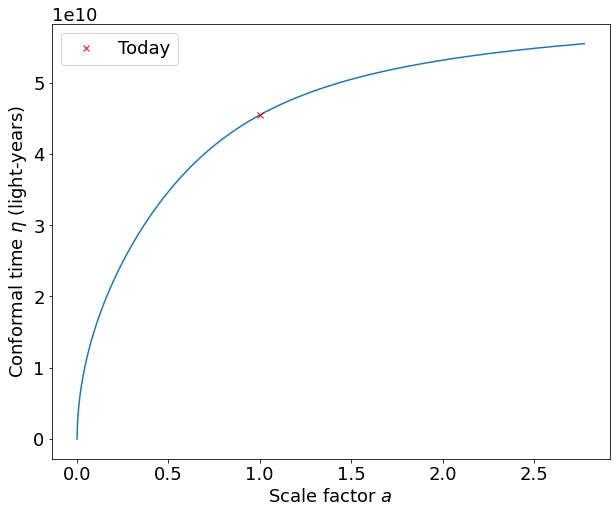

In [28]:
def eta_scale(a, H_0, c, O_m, O_L, O_r):
    return (1/a**2) * ((1/(O_L + (O_r * (a**-4)) + (O_m * (a**-3))))**0.5) * c * (3.262e3/H_0) #Convertendo Mpc para ly de H_0

eta = []

for i in range(len(scale_factor)):
    I1 = integrate.quad(eta_scale, 0, scale_factor[i], args = (H_0, c, Omega_m, Omega_L, Omega_r))
    eta.append(I1[0])

plt.plot(scale_factor, eta)
plt.plot(scale_factor, eta, 'rx', markevery = [22649], label = 'Today')
plt.legend()
plt.xlabel('Scale factor $a$')
plt.ylabel('Conformal time $\eta$ (light-years)')

#Essa distância é o raio comovél do nosso universo

## $\eta$ em função do redshift

Repetimos a troca:

$$ a = \frac{1}{1+z} $$
$$ dz = - \frac{da}{a^2} $$

Nossa integral será:

$$\eta = \frac{c}{H_0} \int \frac{dz}{\sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + \Omega_\Lambda}} $$

Text(0, 0.5, 'Conformal time $\\eta$ (light-years)')

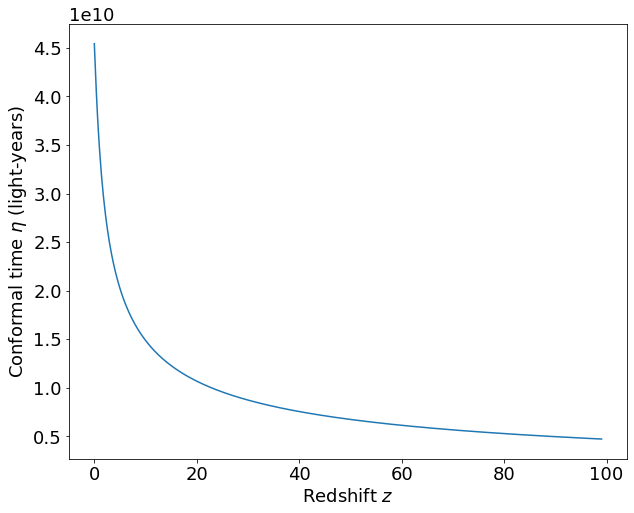

In [12]:
def eta_red(z, H_0, c, O_m, O_L, O_r):
    return (O_L + (O_r * ((1+z)**4)) + (O_m * ((1+z)**3)))**-0.5 * c * (3.262e3/H_0) #Convertendo Mpc para ly de H_0

redshift_eta = []
eta_z = []

z = np.linspace(1e-9, 99, 500)

for i in range(len(z)):
    redshift_eta.append(z[i])
    I1 = integrate.quad(eta_red, z[i], 1e5, args = (H_0, c, Omega_m, Omega_L, Omega_r))
    eta_z.append(I1[0])

plt.plot(redshift_eta, eta_z)
plt.xlabel('Redshift $z$')
plt.ylabel('Conformal time $\eta$ (light-years)')

Text(0, 0.5, 'Conformal time $\\eta$ (light-years)')

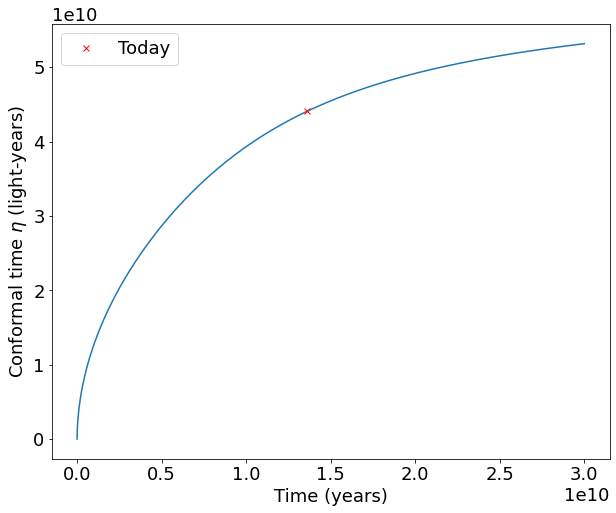

In [26]:
eta_t = []

for i in range(len(time)):
    I1 = integrate.quad(eta_scale, 0, scale_factor[i], args = (H_0, c, Omega_m, Omega_L, Omega_r))
    eta_t.append(I1[0])

plt.plot(time, eta)
plt.plot(time, eta, 'rx', markevery = [22649], label = 'Today')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Conformal time $\eta$ (light-years)')

## Constante de Hubble em função do tempo conforme

É possível compor a função $ H(a(\eta)) $

(10000000000.0, 50000000000.0)

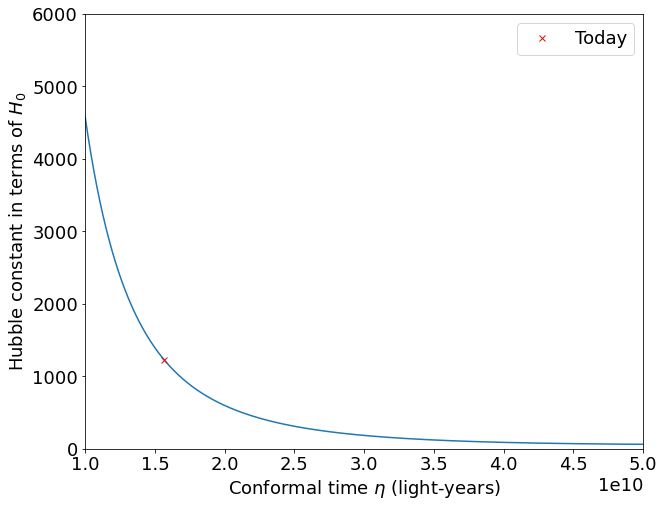

In [18]:
Hubble_eta = []

for i in range(len(a)):
    H_eta = H_a(H_0, Omega_m, Omega_r, Omega_L, a[i])
    Hubble_eta.append(H_eta)

plt.plot(eta, Hubble_eta)
plt.plot(eta, Hubble_eta, 'rx', markevery = [2499], label = 'Today')
plt.legend()

plt.ylabel('Hubble constant in terms of $H_0$')
plt.xlabel('Conformal time $\eta$ (light-years)')
plt.ylim(0, 6*1e3)
plt.xlim(1e10, 5e10)

## Evolução da densidade de energia em função do tempo conforme

Text(0, 0.5, 'log($\\Omega$)')

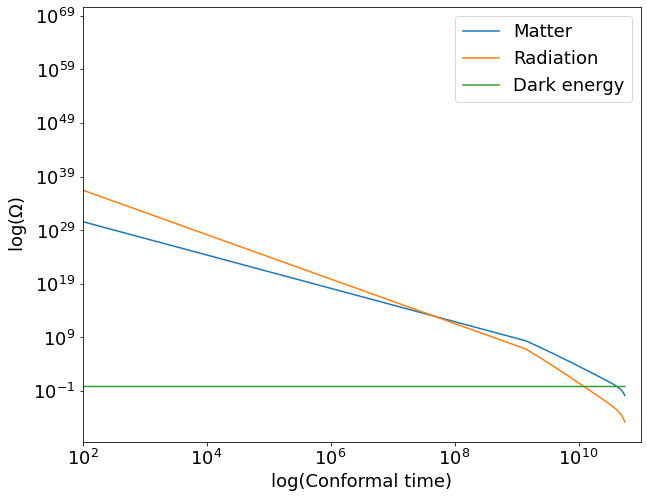

In [42]:
mat_eta=np.empty(len(scale_factor))
radi_eta=np.empty(len(scale_factor))
dark_eta=np.empty(len(scale_factor))

for i in range (len(scale_factor)):
    mat_eta[i]=Omega_m/(scale_factor[i]**(3))
    radi_eta[i]=Omega_r/(scale_factor[i]**(4))
    dark_eta[i]=Omega_L
    

    
plt.plot(eta,mat_eta,label='Matter')
plt.plot(eta,radi_eta,label='Radiation')
plt.plot(eta,dark_eta,label='Dark energy')

plt.legend()

plt.yscale('log')
plt.xscale('log')
plt.xlim(1e2,10e10)

plt.xlabel('log(Conformal time)')
plt.ylabel('log($\Omega$)')


# Parâmetro de desaceleração

Partindo da segunda equação de Friedmann, vamos dividir os dois lados por $\rho_{cr}$ e substituir a equação de estado ($p_i = \omega_i \rho_i c^2$):

$$\frac{\ddot a}{a} \frac{8 \pi G}{3 H_0 ^2} = -\frac{4 \pi G}{3} \sum_i \Omega_i(1+3\omega_i)$$

Como $H = \frac{\dot a}{a}$ temos:

$$-\frac{\ddot a a}{\dot a} = \frac{1}{2} \Omega_m + \Omega_r -\Omega_\Lambda  $$

O termo $-\frac{\ddot a a}{\dot a}$ é o chamado parâmetro de desaceleração $q$.

$$q_0 = \frac{1}{2} \Omega_m + \Omega_r -\Omega_\Lambda  $$

## Parâmetro de desaceleração em função do fator de escala

Podemos retornar a dependência de $q(a)$ com as devidas razões das densidades de energia, logo:

$$q = \frac{1}{2} \frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4} -\Omega_\Lambda  $$

[0.60689941]


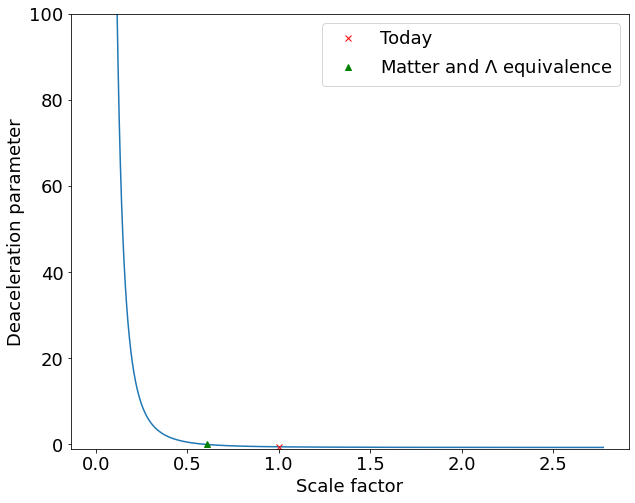

In [34]:
q = []

def q_a(a, O_m, O_r, O_L):
    return 0.5*O_m*(a**-3) + O_r*(a**-4) - O_L

for i in range(len(scale_factor)):
    q.append(q_a(scale_factor[i], Omega_m, Omega_r, Omega_L)[0])

plt.plot(scale_factor, q)
plt.plot(scale_factor, q, 'rx', markevery = [22649], label = 'Today')
plt.plot(scale_factor, q, 'g^', markevery = [12508], label = 'Matter and $\Lambda$ equivalence')
plt.legend()
plt.ylim(-1, 1e2)
plt.ylabel('Deaceleration parameter')
plt.xlabel('Scale factor')

print(scale_factor[12508])

#Aqui vemos uma desaceleração negativa, que indica o início da era de predominância da cosntante cosmológica

## Parâmetro de desaceleração em função do tempo

Agora compomos a função $q(a(t))$

Text(0.5, 0, 'Age of the universe (years)')

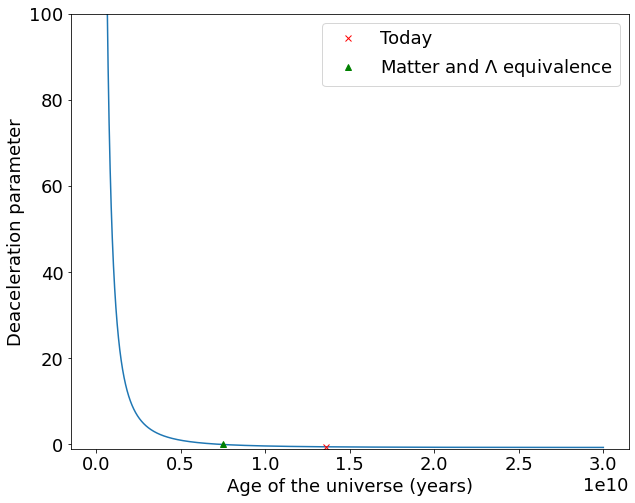

In [35]:
plt.plot(time, q)
plt.plot(time, q, 'rx', markevery = [22649], label = 'Today')
plt.plot(time, q, 'g^', markevery = [12508], label = 'Matter and $\Lambda$ equivalence')
plt.legend()
plt.ylim(-1, 1e2)
plt.ylabel('Deaceleration parameter')
plt.xlabel('Age of the universe (years)')

## $q$ em função do redshift

$$q = \frac{1}{2} \frac{\Omega_m}{(1 +z)^3} + \frac{\Omega_r}{(1+z)^4} -\Omega_\Lambda  $$

Text(0.5, 0, 'Redshift')

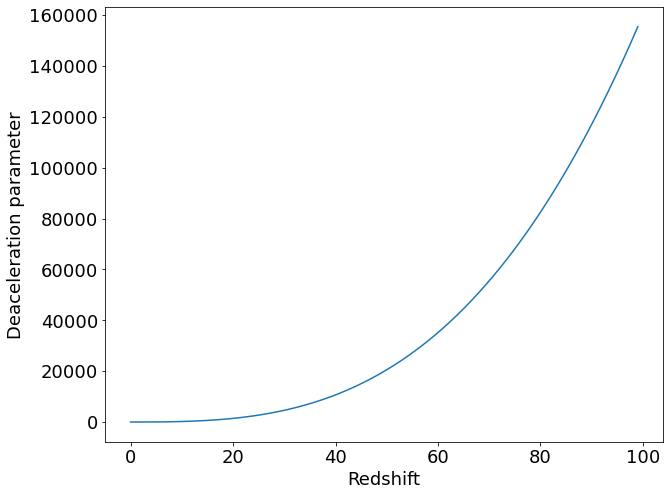

In [38]:
q_red = []

def q_z(z, O_m, O_r, O_L):
    return 0.5*O_m*((1+z)**3) + O_r*((1+z)**4) - O_L

for i in range(len(z)):
    q_red.append(q_z(z[i], Omega_m, Omega_r, Omega_L))

plt.plot(z, q_red)
plt.ylabel('Deaceleration parameter')
plt.xlabel('Redshift')

Text(0.5, 0, 'Conformal time $\\eta$ (light-years)')

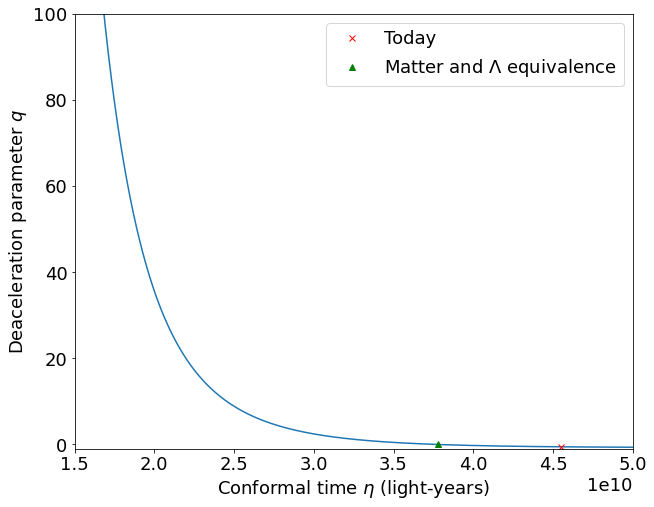

In [37]:
plt.plot(eta, q)
plt.ylim(-1, 1e2)
plt.xlim(1.5e10, 5*1e10)
plt.plot(eta, q, 'rx', markevery = [22649], label = 'Today')
plt.plot(eta, q, 'g^', markevery = [12508], label = 'Matter and $\Lambda$ equivalence')
plt.legend()

plt.ylabel('Deaceleration parameter $q$')
plt.xlabel('Conformal time $\eta$ (light-years)')


# Distâncias

## Distância comóvel

Medir distâncias em astronomia pode ser algo complicado. Considere um feixe de luz emitido em um tempo $t_0$ e observado em $t$. Seu percurso é dado por:

$$cdt=adx \Rightarrow  dx= c\frac{da}{a^2H(z)}$$

Pois $\frac{da}{dt}=aH$. Como $a=(1+z)$:

$$ dx=-c\frac{dz}{H(z)}$$

A distância comóvel que o feixe percorreu é, portanto,

$$x= \frac{c}{H_0}\int_0^z \frac{dz}{\sqrt{\left(\Omega_m\left(1 + z\right)^3 + \Omega_r\left(1 + z\right)^4 +\Omega_\Lambda \right)}}$$

Text(0, 0.5, 'Distance (Mpc)')

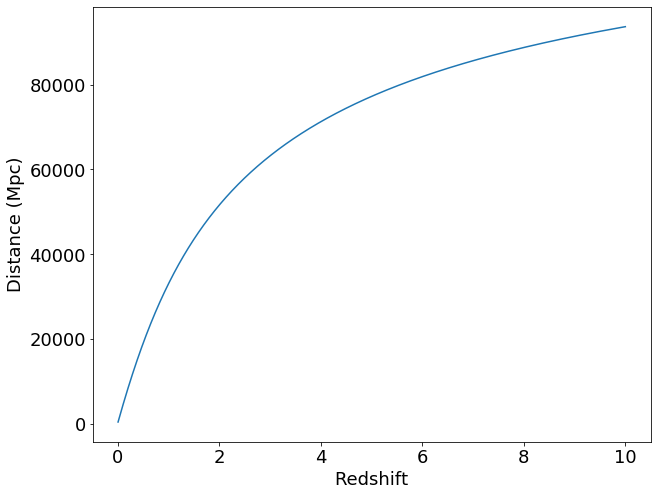

In [80]:
redshift_dist=np.linspace(1e-2,10,2000)
comoving_dist=np.empty( len(redshift_dist) )

def comoving_distance (z, c, H_0, Omega_m, Omega_r, Omega_L):
    return (c/100) * (H_0 * (Omega_m * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_L)** (1/2)) ** (-1)

for i in range ( len(redshift_dist) ):
    comoving_dist[i] = integrate.quad (comoving_distance, 0, redshift_dist[i], \
                                       args =(c, H_0, Omega_m, Omega_r, Omega_L)) [0]
    
plt.plot(redshift_dist,comoving_dist)
plt.xlabel('Redshift')
plt.ylabel('Distance (Mpc)')

## Distância luminosa

O fluxo $F$ de luz a uma distância $d$ de uma fonte com luminosidade $L$ conhecida é:

$$ F=\frac{L}{4\pi d^2} $$

Em uma distância comóvel $x$:

$$ F=\frac{L}{4\pi x^2} $$

Em virtude da expansão, a distância física aumenta com um fator $a$; além disso, a energia que os fótons carregam diminui com um fator $a$, assim, o fluxo de luz se torna:

$$ F=\frac{La^2}{4\pi x^2} \Rightarrow F=\frac{L}{4 \pi (1+z)^2 x^2} $$

Substituindo o fluxo acima na equação com a distância física, obtemos:

$$d=x(1+z)$$

Text(0, 0.5, 'Distance (Mpc)')

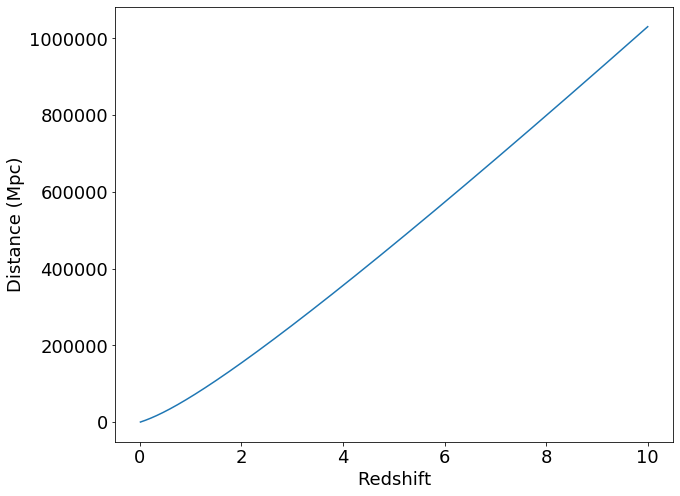

In [81]:
light_dist=np.empty( len(redshift_dist) )

for i in range ( len(redshift_dist) ):
    light_dist[i] = comoving_dist[i] * (1 + redshift_dist[i])

  
plt.plot(redshift_dist,light_dist)
plt.xlabel('Redshift')
plt.ylabel('Distance (Mpc)')

## Distância angular

A distância a um objeto com comprimento $l$ conhecido e com uma abertura angular $\theta$ no céu é:

$$d_a=\frac{l}{a}$$

Em um referencial comóvel, o comprimento $l'$ do objeto é $l/a$, assim, a abertura angular correspondente é:

$$\theta=\frac{l}{ax}$$

Portanto, a distância física ao objeto é:

$$d_a=ax=\frac{x}{1+z}$$

Text(0, 0.5, 'Distance (Mpc)')

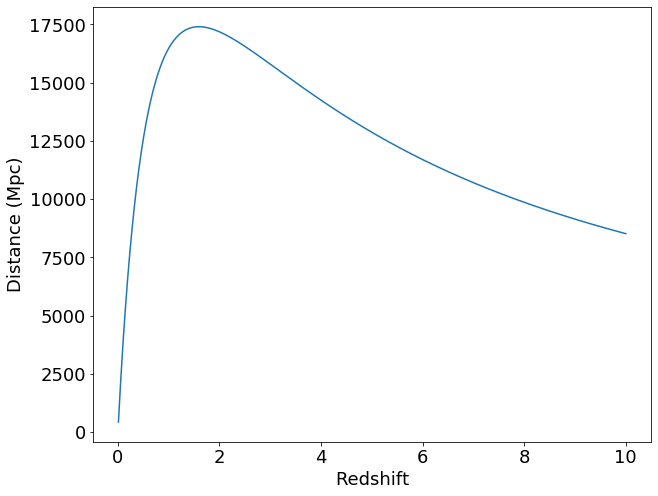

In [82]:
angular_dist=np.empty( len(redshift_dist) )

for i in range ( len(redshift_dist) ):
    angular_dist[i] = comoving_dist[i] / (1 + redshift_dist[i])

  
plt.plot(redshift_dist,angular_dist)
plt.xlabel('Redshift')
plt.ylabel('Distance (Mpc)')

A diminuição da distância angular em grandes redshifts decorre do aparente aumento de tamanho de objetos distantes.

Text(0, 0.5, 'log(Distance)')

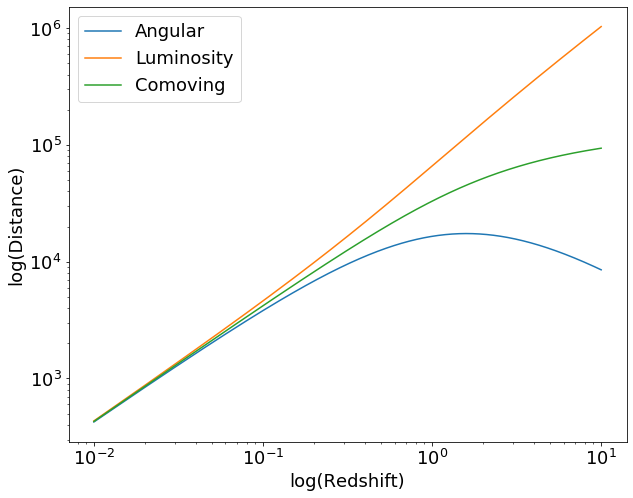

In [83]:
plt.plot(redshift_dist,angular_dist,label='Angular')
plt.plot(redshift_dist,light_dist,label='Luminosity')
plt.plot(redshift_dist,comoving_dist,label='Comoving')
plt.legend()

plt.yscale('log')
plt.xscale('log')

plt.xlabel('log(Redshift)')
plt.ylabel('log(Distance)')